In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2023-04-24 17:13:51.594226: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /N/soft/rhel7/java/1.8.0_131/jre/lib/amd64/server/:/N/soft/rhel7/curl/intel/7.54.0/lib:/N/soft/rhel7/python/3.9.8/lib:/N/soft/rhel7/openmpi/gnu/4.0.4/lib:/N/soft/rhel7/libpng/1.2.57/lib:/N/soft/rhel7/gcc/9.3.0/lib64:/N/soft/rhel7/gcc/9.3.0/lib:/N/soft/rhel7/intel/19.5/compilers_and_libraries_2019.5.281/linux/compiler/lib/intel64:/N/soft/rhel7/intel/19.5/compilers_and_libraries_2019.5.281/linux/ipp/lib/intel64:/N/soft/rhel7/intel/19.5/compilers_and_libraries_2019.5.281/linux/compiler/lib/intel64_lin:/N/soft/rhel7/intel/19.5/compilers_and_libraries_2019.5.281/linux/mkl/lib/intel64_lin:/N/soft/rhel7/intel/19.5/compilers_and_libraries_2019.5.281/linux/tbb/lib/intel64/gcc4.7:/N/soft/rhel7/intel/19.5/debugger_2019/iga/lib:/N/soft/rhel7/intel/19.5/d

In [2]:
import os

# path = "C:/Users/akhil/Desktop/DeepLearning-Project"
#path = "/content/drive/MyDrive/DeepLearning-Project"
path = "/N/u/asimham/Carbonate/Downloads/DeepLearning-Project"
train_path = path+'/train'
test_path = path+'/test'

os.listdir(path)

['Project Proposal Presentation.pptx', 'train', 'val', 'test']

In [3]:
#import os

#path = "C:/Users/akhil/Desktop/DeepLearning-Project"

#train_path = path+'/train'
#test_path = path+'/test'

os.listdir(path)

['Project Proposal Presentation.pptx', 'train', 'val', 'test']

In [4]:
train_norm = len(os.listdir(train_path+'/NORMAL'))
train_pne = len(os.listdir(train_path+'/PNEUMONIA'))
print("Total number of images in train set", (train_norm+train_pne))

Total number of images in train set 5216


In [5]:
test_norm = len(os.listdir(test_path+'/NORMAL'))
test_pne = len(os.listdir(test_path+'/PNEUMONIA'))
print("Total number of images in test set", (test_norm+test_pne))

Total number of images in test set 624


In [7]:
os.listdir(train_path)

['PNEUMONIA', 'NORMAL']

In [8]:
train_paths = []
train_labels = []

for label in os.listdir(train_path):
    for image in os.listdir(train_path+'/'+label):
        train_paths.append(train_path+label+'/'+image)
        train_labels.append(label)

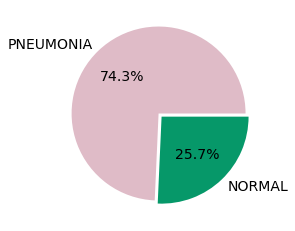

In [10]:
colors = ['#DFBBC7', '#069869']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in train_labels if x=='PNEUMONIA']),
         len([x for x in train_labels if x=='NORMAL'])],
        labels=['PNEUMONIA', 'NORMAL'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025))
plt.show()

In [11]:
test_paths = []
test_labels = []

for label in os.listdir(test_path):
    for image in os.listdir(test_path+'/'+label):
        test_paths.append(test_path+label+'/'+image)
        test_labels.append(label)

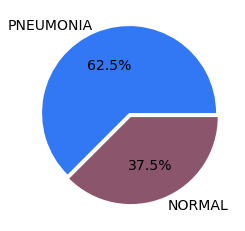

In [12]:
colors = ['#3277f4', '#8b566c']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in test_labels if x=='PNEUMONIA']),
         len([x for x in test_labels if x=='NORMAL'])],
        labels=['PNEUMONIA', 'NORMAL'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025))
plt.show()

In [13]:
def plot_image(path, title):
    image_filenames = os.listdir(path)
    fig, axs = plt.subplots(1, 4, figsize=(20,10))
    for i in range(4):
        image_data = plt.imread(path + '/' + image_filenames[i])
        print(image_data.shape)
        axs[i].imshow(image_data, cmap="gray")
        axs[i].set_title(title)
    plt.show()

(1476, 1812)
(1422, 1642)
(1245, 1642)
(1313, 1654)


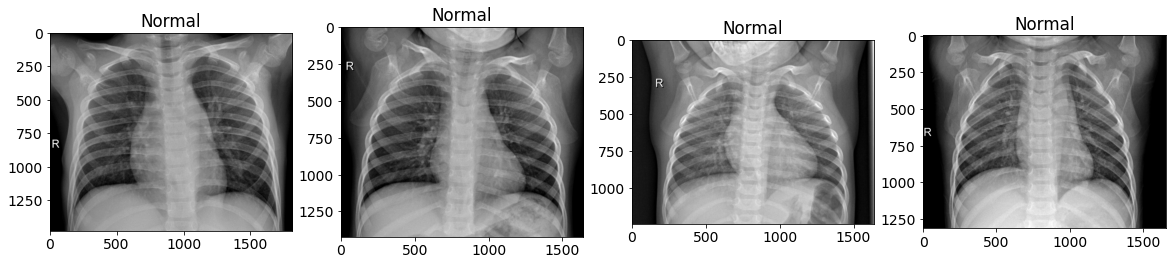

In [14]:
image_folder_path = train_path + '/NORMAL'
plot_image(image_folder_path, "Normal")

(848, 1072)
(728, 1152)
(784, 1152)
(915, 1411)


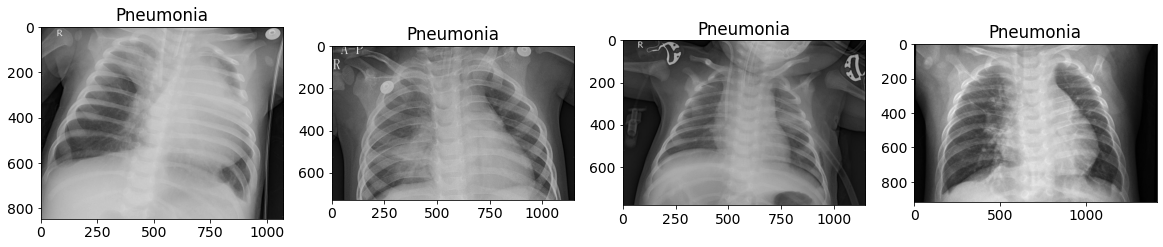

In [16]:
image_folder_path = train_path + '/PNEUMONIA'
plot_image(image_folder_path, "Pneumonia")

In [17]:
image_shape = (128,128,3)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=.1,
                               height_shift_range=.1,
                               shear_range=.1,
                               zoom_range = .1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [19]:
image_gen.flow_from_directory(train_path)

Found 5216 images belonging to 2 classes.


In [20]:
image_gen.flow_from_directory(test_path)

Found 624 images belonging to 2 classes.


In [21]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='binary')
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Model1 -Basic CNN

In [26]:
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential

model1 = Sequential()

model1.add(Conv2D(32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(.5))

model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=4, mode='min')

In [70]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)      

In [106]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score
#Make predictions on the test data
y_pred = model1.predict(test_image_gen)
y_pred_classes = np.round(y_pred)
# Obtain the confusion matrix
cm = confusion_matrix(test_image_gen.classes, y_pred_classes)
# Obtain the classification report
cr = classification_report(test_image_gen.classes, y_pred_classes)
# Obtain the F1-score and recall
f1 = f1_score(test_image_gen.classes, y_pred_classes)
recall = recall_score(test_image_gen.classes, y_pred_classes)

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
historymodel1 = model1.fit(train_image_gen, epochs=10,
                              validation_data = test_image_gen,
                              callbacks=[early_stop])

Epoch 1/10
163/163 [==============================] - 162s 991ms/step - loss: 0.5808 - accuracy: 0.7966 - val_loss: 0.4645 - val_accuracy: 0.7933
Epoch 2/10
163/163 [==============================] - 96s 586ms/step - loss: 0.3542 - accuracy: 0.8497 - val_loss: 0.5133 - val_accuracy: 0.7724
Epoch 3/10
163/163 [==============================] - 94s 578ms/step - loss: 0.2993 - accuracy: 0.8809 - val_loss: 0.8066 - val_accuracy: 0.6859
Epoch 4/10
163/163 [==============================] - 93s 572ms/step - loss: 0.2871 - accuracy: 0.8848 - val_loss: 0.5514 - val_accuracy: 0.7917
Epoch 5/10
163/163 [==============================] - 93s 571ms/step - loss: 0.2646 - accuracy: 0.8992 - val_loss: 0.4610 - val_accuracy: 0.7869
Epoch 6/10
163/163 [==============================] - 93s 569ms/step - loss: 0.2387 - accuracy: 0.9124 - val_loss: 0.4406 - val_accuracy: 0.8237
Epoch 7/10
163/163 [==============================] - 93s 570ms/step - loss: 0.2640 - accuracy: 0.8976 - val_loss: 0.4833 - val_a

In [31]:
loss, accuracy = model1.evaluate(test_image_gen)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

20/20 [==============================] - 7s 355ms/step - loss: 0.6239 - accuracy: 0.7788
Test loss: 0.6238998770713806
Test accuracy: 0.7788461446762085


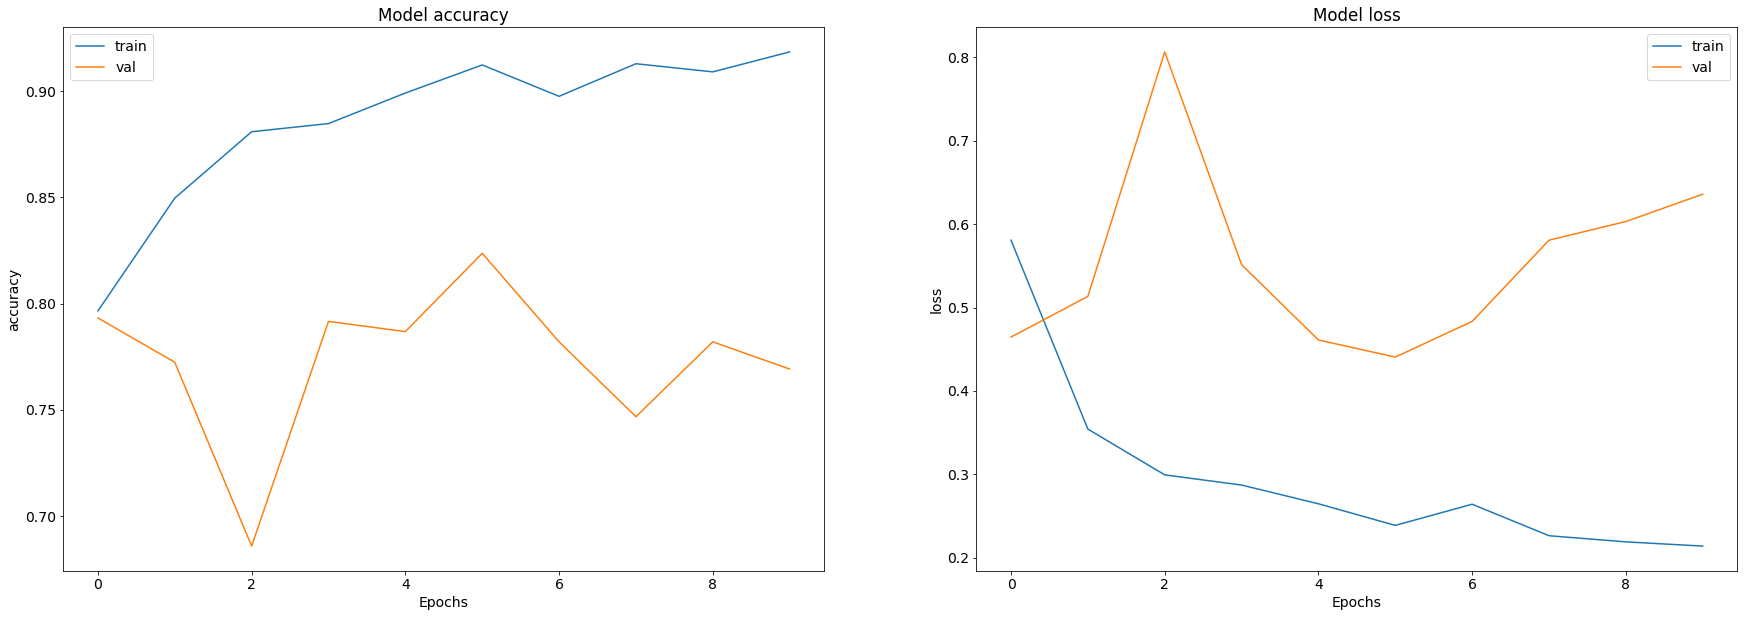

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(historymodel1.history[metric])
    ax[i].plot(historymodel1.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train","val"])

Model 2 - CNN

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the input shape of the images
input_shape = (128, 128, 3)

# Define the model architecture
model2 = Sequential()

# Add the first convolutional layer with 32 filters of size 3x3
model2.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
# Add the first max-pooling layer with a pool size of 2x2
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer with 64 filters of size 3x3
model2.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
# Add the second max-pooling layer with a pool size of 2x2
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer with 128 filters of size 3x3
model2.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
# Add the third max-pooling layer with a pool size of 2x2
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add the fourth convolutional layer with 256 filters of size 3x3
model2.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
# Add the fourth max-pooling layer with a pool size of 2x2
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add the flatten layer
model2.add(Flatten())

# Add the first dense layer with 512 neurons and ReLU activation function
model2.add(Dense(512, activation='relu'))
# Add a dropout layer with a rate of 0.5 to prevent overfitting
model2.add(Dropout(0.5))

# Add the output dense layer with a single neuron and sigmoid activation function
model2.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss function, Adam optimizer, and accuracy metric
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the data generator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

historymodel2 = model2.fit(train_image_gen, epochs=10,
                              validation_data = test_image_gen,
                              callbacks=[early_stop])


Epoch 1/10
41/41 [==============================] - 114s 3s/step - loss: 0.6037 - accuracy: 0.7370 - val_loss: 0.7748 - val_accuracy: 0.6250
Epoch 2/10
41/41 [==============================] - 109s 3s/step - loss: 0.4191 - accuracy: 0.7868 - val_loss: 0.3959 - val_accuracy: 0.8221
Epoch 3/10
41/41 [==============================] - 108s 3s/step - loss: 0.3236 - accuracy: 0.8524 - val_loss: 0.4774 - val_accuracy: 0.7372
Epoch 4/10
41/41 [==============================] - 110s 3s/step - loss: 0.3262 - accuracy: 0.8551 - val_loss: 0.3271 - val_accuracy: 0.8670
Epoch 5/10
41/41 [==============================] - 110s 3s/step - loss: 0.2655 - accuracy: 0.8838 - val_loss: 0.2823 - val_accuracy: 0.8846
Epoch 6/10
41/41 [==============================] - 110s 3s/step - loss: 0.2439 - accuracy: 0.8940 - val_loss: 0.3001 - val_accuracy: 0.8990
Epoch 7/10
41/41 [==============================] - 108s 3s/step - loss: 0.2434 - accuracy: 0.8986 - val_loss: 0.4556 - val_accuracy: 0.8045
Epoch 8/10
41

In [91]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 128)     

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score
#Make predictions on the test data
y_pred = model2.predict(test_image_gen)
y_pred_classes = np.round(y_pred)
# Obtain the confusion matrix
cm = confusion_matrix(test_image_gen.classes, y_pred_classes)
# Obtain the classification report
cr = classification_report(test_image_gen.classes, y_pred_classes)
# Obtain the F1-score and recall
f1 = f1_score(test_image_gen.classes, y_pred_classes)
recall = recall_score(test_image_gen.classes, y_pred_classes)

In [76]:
loss, accuracy = model2.evaluate(test_image_gen)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

5/5 [==============================] - 7s 1s/step - loss: 0.2743 - accuracy: 0.9022
Test loss: 0.274258553981781
Test accuracy: 0.9022436141967773


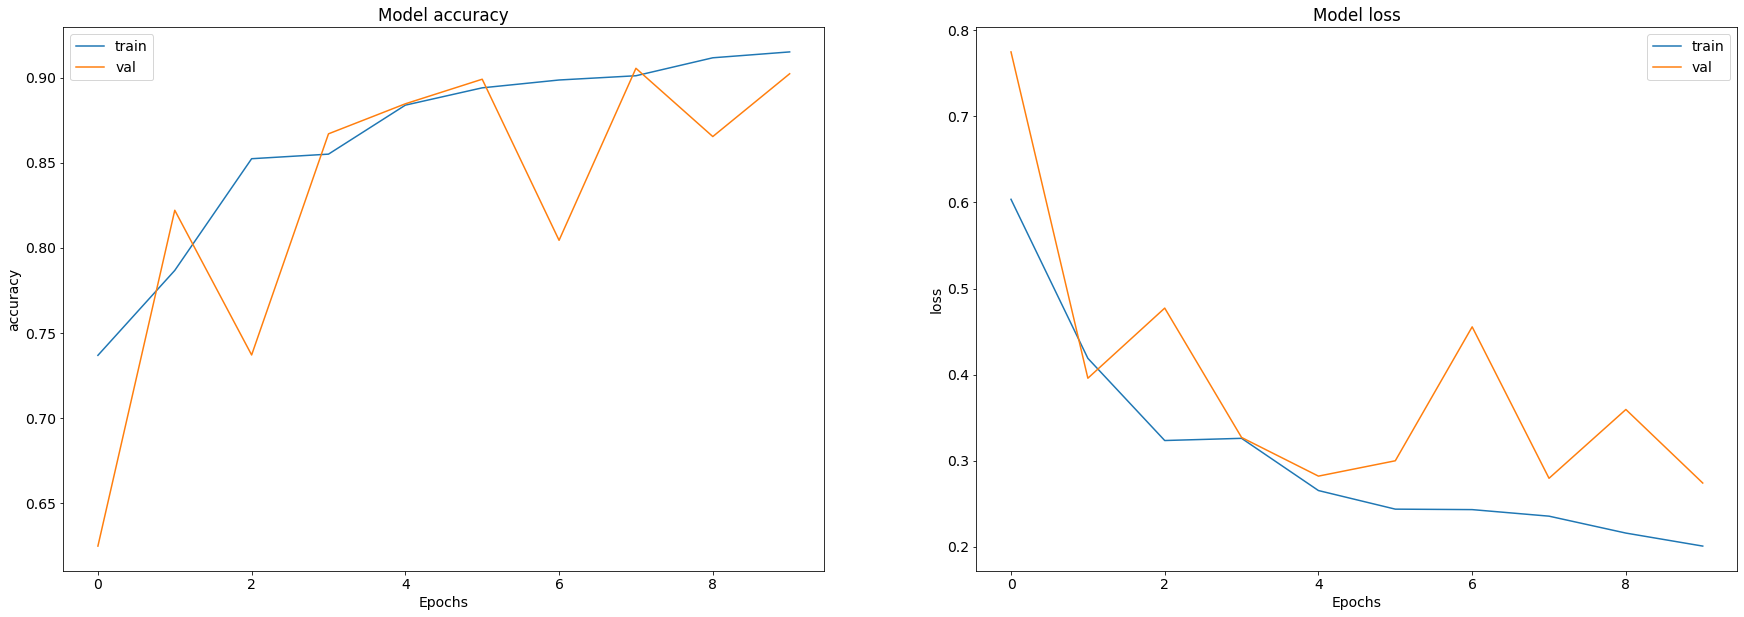

In [78]:
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(historymodel2.history[metric])
    ax[i].plot(historymodel2.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train","val"])

In [96]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score
#Make predictions on the test data
y_pred = model_zf.predict(test_image_gen)
y_pred_classes = np.round(y_pred)
# Obtain the confusion matrix
cm = confusion_matrix(test_image_gen.classes, y_pred_classes)
# Obtain the classification report
cr = classification_report(test_image_gen.classes, y_pred_classes)
# Obtain the F1-score and recall
f1 = f1_score(test_image_gen.classes, y_pred_classes)
recall = recall_score(test_image_gen.classes, y_pred_classes)


ResNet

In [66]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Instantiate ResNet50 model with pre-trained weights
res = ResNet50(input_shape=image_shape, weights='imagenet', include_top=False)

# Freeze all the layers in the ResNet50 model
for layer in res.layers:
    layer.trainable = False

# Add a normalization layer to the input
inputs = Input(shape=image_shape)
x = BatchNormalization()(inputs)

# Add the ResNet50 model on top of the normalization layer
x = res(x)

# Flatten the output of the ResNet50 model
x = Flatten()(x)

# Add a dense layer with L2 regularization and ReLU activation
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)

# Add a dropout layer to reduce overfitting
x = Dropout(0.5)(x)

# Add the output layer with sigmoid activation for binary classification
outputs = Dense(1, activation='sigmoid')(x)

# Define the model with input and output layers
modelResNet = Model(inputs=inputs, outputs=outputs)

# Compile the model with binary cross-entropy loss and Adam optimizer
modelResNet.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Train the model with data generators and validation data
historyRes = modelResNet.fit(train_image_gen, epochs=8,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/8
41/41 [==============================] - 280s 7s/step - loss: 0.9325 - accuracy: 0.8150 - val_loss: 2.3265 - val_accuracy: 0.6250
Epoch 2/8
41/41 [==============================] - 275s 7s/step - loss: 0.3861 - accuracy: 0.8781 - val_loss: 2.2494 - val_accuracy: 0.6250
Epoch 3/8
41/41 [==============================] - 276s 7s/step - loss: 0.3533 - accuracy: 0.8798 - val_loss: 2.5287 - val_accuracy: 0.6250
Epoch 4/8
41/41 [==============================] - 277s 7s/step - loss: 0.3550 - accuracy: 0.8775 - val_loss: 2.0031 - val_accuracy: 0.6250
Epoch 5/8
41/41 [==============================] - 280s 7s/step - loss: 0.3352 - accuracy: 0.8815 - val_loss: 1.6217 - val_accuracy: 0.6266
Epoch 6/8
41/41 [==============================] - 285s 7s/step - loss: 0.3292 - accuracy: 0.8863 - val_loss: 1.3628 - val_accuracy: 0.6506
Epoch 7/8
41/41 [==============================] - 307s 7s/step - loss: 0.3335 - accuracy: 0.8844 - val_loss: 0.9890 - val_accuracy: 0.6971
Epoch 8/8
41/41 [===

In [67]:
modelResNet.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 batch_normalization_9 (Batc  (None, 128, 128, 3)      12        
 hNormalization)                                                 
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_8 (Flatten)         (None, 32768)             0         
                                                                 
 dense_25 (Dense)            (None, 128)               4194432   
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                           

In [102]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score
#Make predictions on the test data
y_pred = modelResNet.predict(test_image_gen)
y_pred_classes = np.round(y_pred)
# Obtain the confusion matrix
cm = confusion_matrix(test_image_gen.classes, y_pred_classes)
# Obtain the classification report
cr = classification_report(test_image_gen.classes, y_pred_classes)
# Obtain the F1-score and recall
f1 = f1_score(test_image_gen.classes, y_pred_classes)
recall = recall_score(test_image_gen.classes, y_pred_classes)

In [68]:
loss, accuracy = modelResNet.evaluate(test_image_gen)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

5/5 [==============================] - 12s 2s/step - loss: 0.6653 - accuracy: 0.7853
Test loss: 0.6652975678443909
Test accuracy: 0.7852563858032227


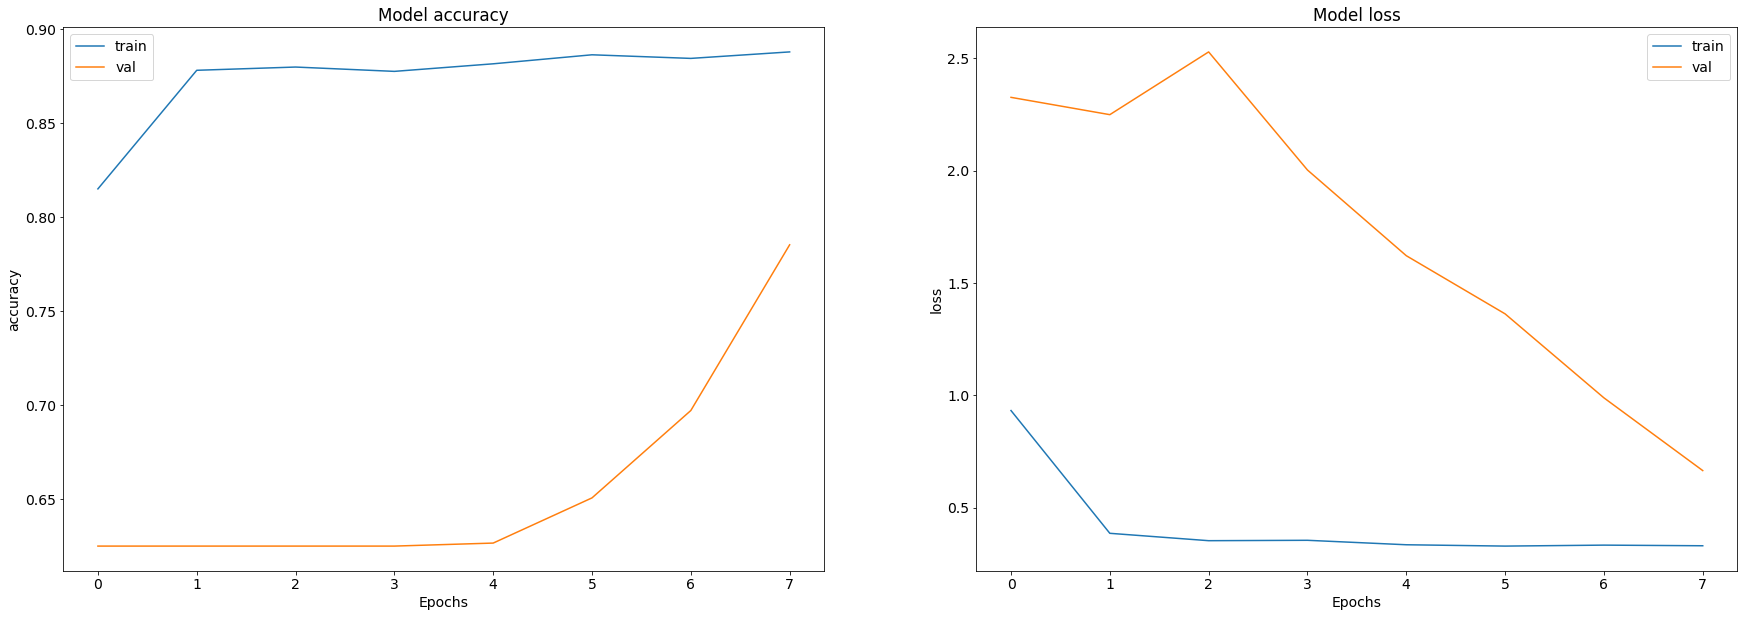

In [69]:
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(historyRes.history[metric])
    ax[i].plot(historyRes.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train","val"])

VGG

In [46]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import regularizers

batch_size = 32

vgg = VGG16(input_shape=image_shape, weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

# Add additional layers to the pre-trained VGG16 model with regularization
x = Flatten()(vgg.output)
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)

# Add final prediction layer
prediction = Dense(1, activation='sigmoid')(x)

# Compile the model with L2 regularization
modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model with early stopping callback and batching
historyvgg = modelvgg.fit(train_image_gen, epochs=20,
                              validation_data = test_image_gen,
                              callbacks=[early_stop],
                              batch_size=batch_size)

58900480/58889256 [==============================] - 1s 0us/step
Epoch 1/20
41/41 [==============================] - 332s 8s/step - loss: 6.9237 - accuracy: 0.7705 - val_loss: 3.4579 - val_accuracy: 0.8558
Epoch 2/20
41/41 [==============================] - 333s 8s/step - loss: 2.4654 - accuracy: 0.8861 - val_loss: 1.8223 - val_accuracy: 0.8814
Epoch 3/20
41/41 [==============================] - 331s 8s/step - loss: 1.4367 - accuracy: 0.8928 - val_loss: 1.2287 - val_accuracy: 0.8301
Epoch 4/20
41/41 [==============================] - 347s 8s/step - loss: 0.9659 - accuracy: 0.8997 - val_loss: 0.8521 - val_accuracy: 0.9071
Epoch 5/20
41/41 [==============================] - 333s 8s/step - loss: 0.7004 - accuracy: 0.9072 - val_loss: 0.6533 - val_accuracy: 0.8830
Epoch 6/20
41/41 [==============================] - 332s 8s/step - loss: 0.5637 - accuracy: 0.9009 - val_loss: 0.5485 - val_accuracy: 0.8926
Epoch 7/20
41/41 [==============================] - 331s 8s/step - loss: 0.4505 - accurac

In [72]:
modelvgg.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [104]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score
#Make predictions on the test data
y_pred = modelvgg.predict(test_image_gen)
y_pred_classes = np.round(y_pred)
# Obtain the confusion matrix
cm = confusion_matrix(test_image_gen.classes, y_pred_classes)
# Obtain the classification report
cr = classification_report(test_image_gen.classes, y_pred_classes)
# Obtain the F1-score and recall
f1 = f1_score(test_image_gen.classes, y_pred_classes)
recall = recall_score(test_image_gen.classes, y_pred_classes)

In [47]:
loss, accuracy = modelvgg.evaluate(test_image_gen)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

5/5 [==============================] - 34s 7s/step - loss: 0.3576 - accuracy: 0.8974
Test loss: 0.3575764298439026
Test accuracy: 0.8974359035491943


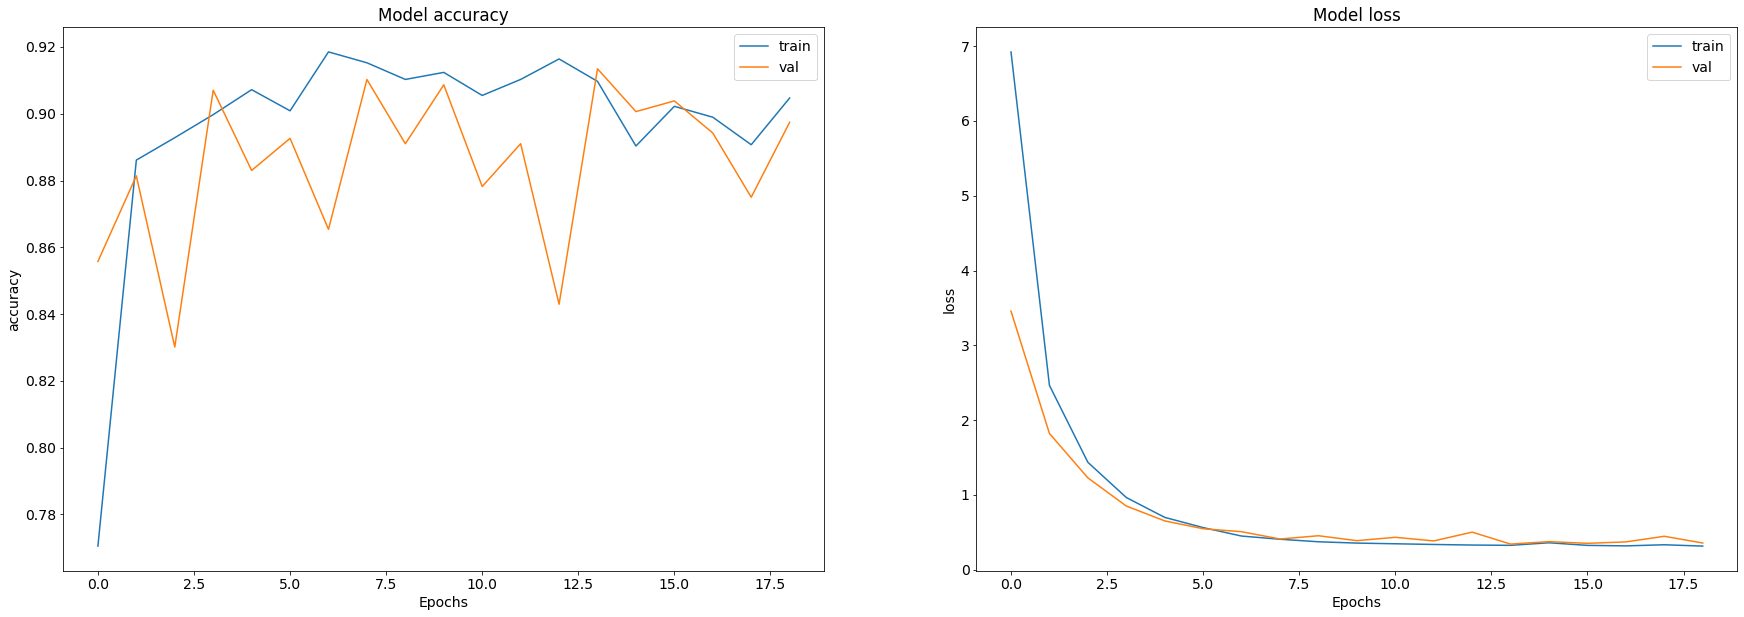

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(historyvgg.history[metric])
    ax[i].plot(historyvgg.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train","val"])

Alex

In [79]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

modelAlex = Sequential()
# Layer 1
modelAlex.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128, 128, 3)))
modelAlex.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
modelAlex.add(BatchNormalization())
# Layer 2
modelAlex.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
modelAlex.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
modelAlex.add(BatchNormalization())
# Layer 3
modelAlex.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
modelAlex.add(BatchNormalization())
# Layer 4
modelAlex.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
modelAlex.add(BatchNormalization())
# Layer 5
modelAlex.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
modelAlex.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
modelAlex.add(BatchNormalization())
# Flatten Layer
modelAlex.add(Flatten())
# Layer 6
modelAlex.add(Dense(4096, activation='relu'))
modelAlex.add(Dropout(0.5))
modelAlex.add(BatchNormalization())
# Layer 7
modelAlex.add(Dense(4096, activation='relu'))
modelAlex.add(Dropout(0.5))
modelAlex.add(BatchNormalization())
# Output Layer
modelAlex.add(Dense(1, activation='sigmoid'))
modelAlex.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

In [80]:
modelAlex.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 30, 30, 96)        34944     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 14, 14, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 14, 256)       614656    
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 6, 6, 256)        0         
 g2D)                                                            
                                                      

In [105]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score
#Make predictions on the test data
y_pred = modelAlex.predict(test_image_gen)
y_pred_classes = np.round(y_pred)
# Obtain the confusion matrix
cm = confusion_matrix(test_image_gen.classes, y_pred_classes)
# Obtain the classification report
cr = classification_report(test_image_gen.classes, y_pred_classes)
# Obtain the F1-score and recall
f1 = f1_score(test_image_gen.classes, y_pred_classes)
recall = recall_score(test_image_gen.classes, y_pred_classes)

In [82]:
historyAlex = modelAlex.fit(train_image_gen,
                    steps_per_epoch=train_image_gen.n // train_image_gen.batch_size,
                    epochs=15,
                    validation_data=test_image_gen,
                    validation_steps=test_image_gen.n // test_image_gen.batch_size)

Epoch 1/15
40/40 [==============================] - 101s 3s/step - loss: 0.2869 - accuracy: 0.9051 - val_loss: 1.5533 - val_accuracy: 0.6328
Epoch 2/15
40/40 [==============================] - 118s 3s/step - loss: 0.2510 - accuracy: 0.9167 - val_loss: 1.5933 - val_accuracy: 0.6133
Epoch 3/15
40/40 [==============================] - 115s 3s/step - loss: 0.2574 - accuracy: 0.9167 - val_loss: 1.5839 - val_accuracy: 0.6348
Epoch 4/15
40/40 [==============================] - 104s 3s/step - loss: 0.2457 - accuracy: 0.9216 - val_loss: 1.6650 - val_accuracy: 0.6367
Epoch 5/15
40/40 [==============================] - 105s 3s/step - loss: 0.2207 - accuracy: 0.9263 - val_loss: 2.8133 - val_accuracy: 0.6250
Epoch 6/15
40/40 [==============================] - 95s 2s/step - loss: 0.2267 - accuracy: 0.9267 - val_loss: 1.7839 - val_accuracy: 0.6387
Epoch 7/15
40/40 [==============================] - 97s 2s/step - loss: 0.1974 - accuracy: 0.9316 - val_loss: 2.5313 - val_accuracy: 0.6211
Epoch 8/15
40/4

In [83]:
loss, accuracy = modelAlex.evaluate(test_image_gen)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

5/5 [==============================] - 9s 2s/step - loss: 0.5384 - accuracy: 0.8269
Test loss: 0.5383812189102173
Test accuracy: 0.8269230723381042


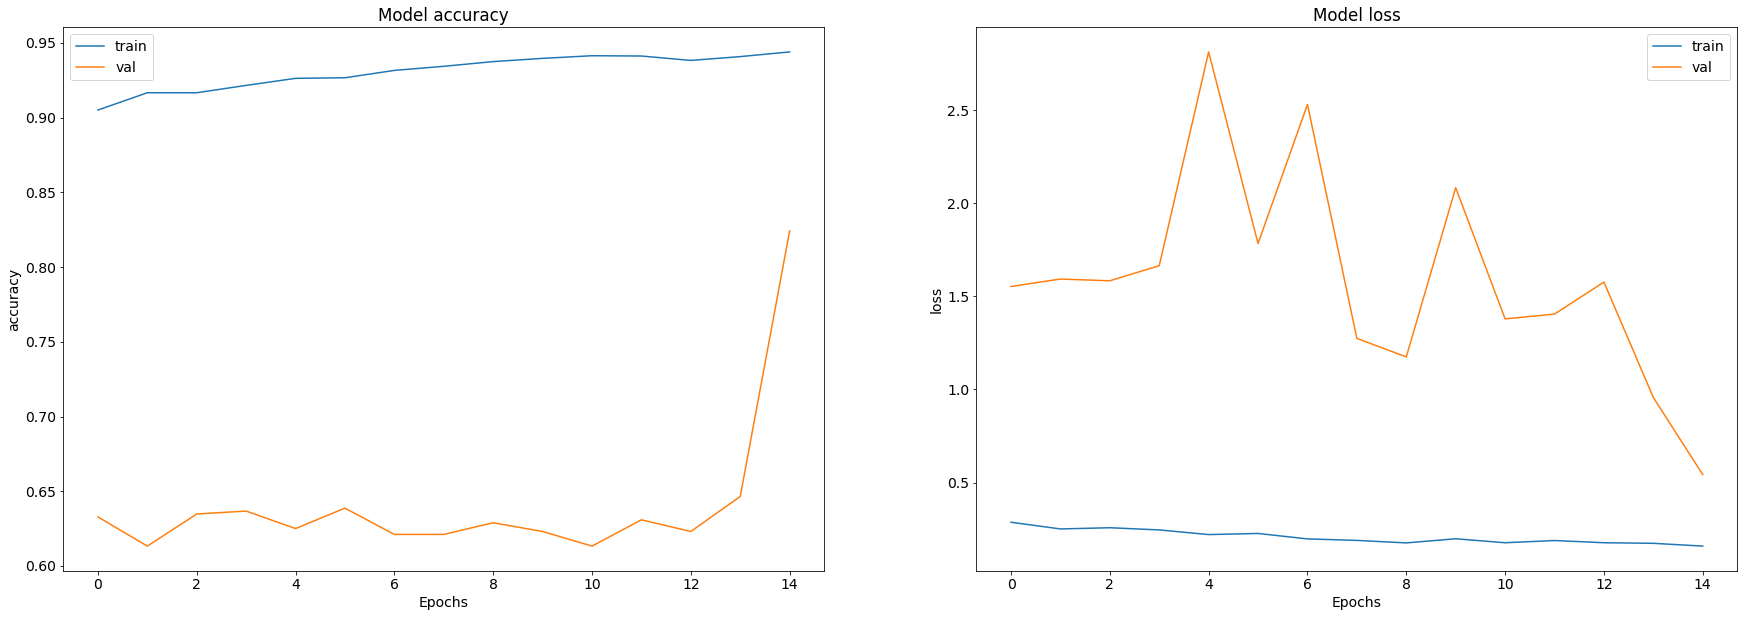

In [84]:
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(historyAlex.history[metric])
    ax[i].plot(historyAlex.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train","val"])

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_zf = Sequential()

# Layer 1
model_zf.add(Conv2D(filters=96, kernel_size=(7,7), strides=(2,2), activation='relu', input_shape=(128, 128, 3), padding='same'))
model_zf.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Layer 2
model_zf.add(Conv2D(filters=256, kernel_size=(5,5), strides=(2,2), activation='relu', padding='same'))
model_zf.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Layer 3
model_zf.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))

# Layer 4
model_zf.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))

# Layer 5
model_zf.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model_zf.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Flatten Layer
model_zf.add(Flatten())

# Layer 6
model_zf.add(Dense(4096, activation='relu'))
model_zf.add(Dropout(0.5))

# Layer 7
model_zf.add(Dense(4096, activation='relu'))
model_zf.add(Dropout(0.5))

# Output Layer
model_zf.add(Dense(1, activation='sigmoid'))

model_zf.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_zf = model_zf.fit(train_image_gen,
                    steps_per_epoch=train_image_gen.n // train_image_gen.batch_size,
                    epochs=20,
                    validation_data=test_image_gen,
                    validation_steps=test_image_gen.n // test_image_gen.batch_size)
 

Epoch 1/20
40/40 [==============================] - 121s 3s/step - loss: 0.7992 - accuracy: 0.7311 - val_loss: 0.6755 - val_accuracy: 0.6289
Epoch 2/20
40/40 [==============================] - 116s 3s/step - loss: 0.5243 - accuracy: 0.7445 - val_loss: 0.6791 - val_accuracy: 0.6973
Epoch 3/20
40/40 [==============================] - 116s 3s/step - loss: 0.4400 - accuracy: 0.7889 - val_loss: 0.5078 - val_accuracy: 0.7422
Epoch 4/20
40/40 [==============================] - 116s 3s/step - loss: 0.3470 - accuracy: 0.8365 - val_loss: 0.4675 - val_accuracy: 0.7754
Epoch 5/20
40/40 [==============================] - 116s 3s/step - loss: 0.3214 - accuracy: 0.8520 - val_loss: 0.4074 - val_accuracy: 0.8223
Epoch 6/20
40/40 [==============================] - 127s 3s/step - loss: 0.3152 - accuracy: 0.8581 - val_loss: 0.3559 - val_accuracy: 0.8457
Epoch 7/20
40/40 [==============================] - 125s 3s/step - loss: 0.2844 - accuracy: 0.8762 - val_loss: 0.5951 - val_accuracy: 0.7441
Epoch 8/20
40

In [74]:
model_zf.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 64, 96)        14208     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 256)       614656    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 384)         885120    
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 384)        

In [60]:
loss, accuracy = model_zf.evaluate(test_image_gen)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

5/5 [==============================] - 6s 1s/step - loss: 0.3051 - accuracy: 0.8734
Test loss: 0.30507996678352356
Test accuracy: 0.8733974099159241


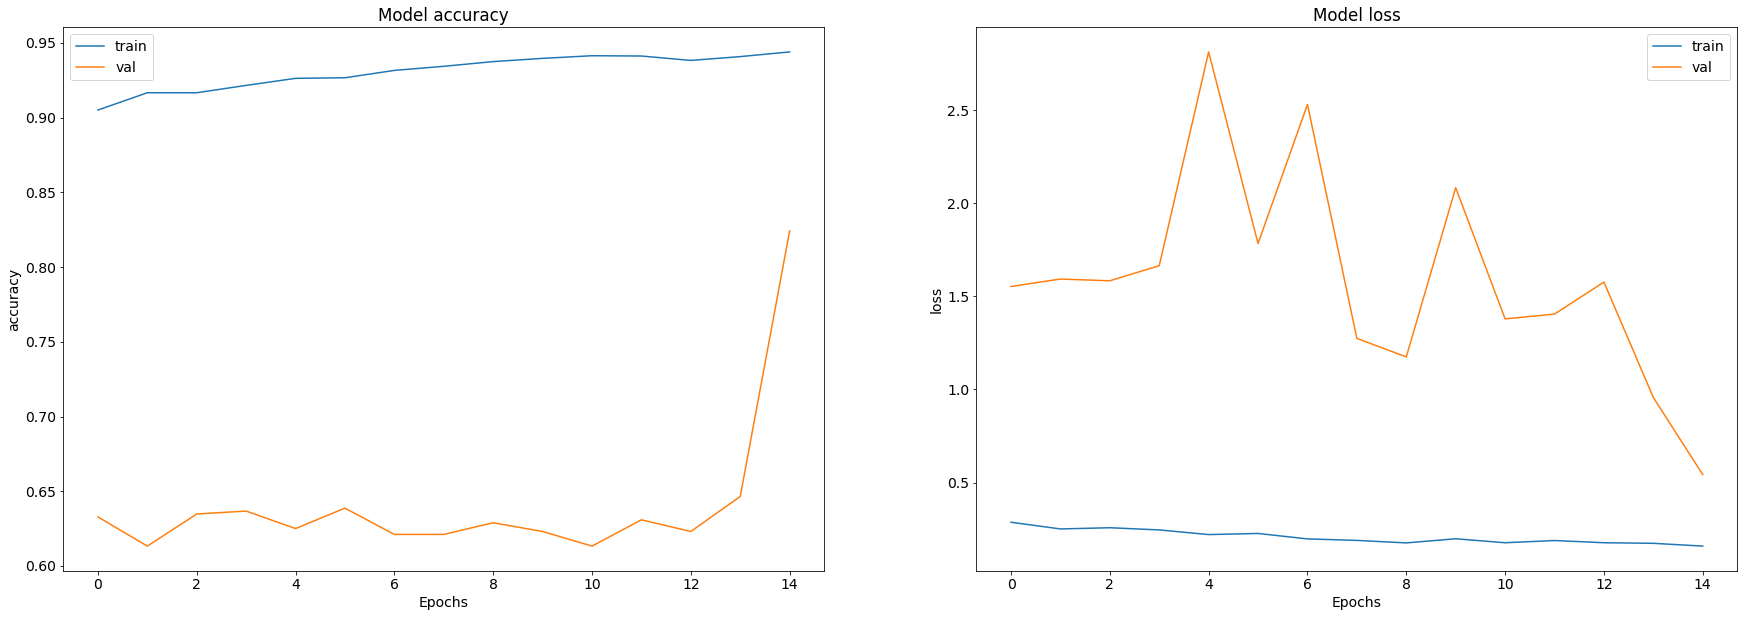

In [90]:
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(historyAlex.history[metric])
    ax[i].plot(historyAlex.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train","val"])

/tmp/ipykernel_19746/735551775.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted = modelvgg.predict_generator(test_image_gen)


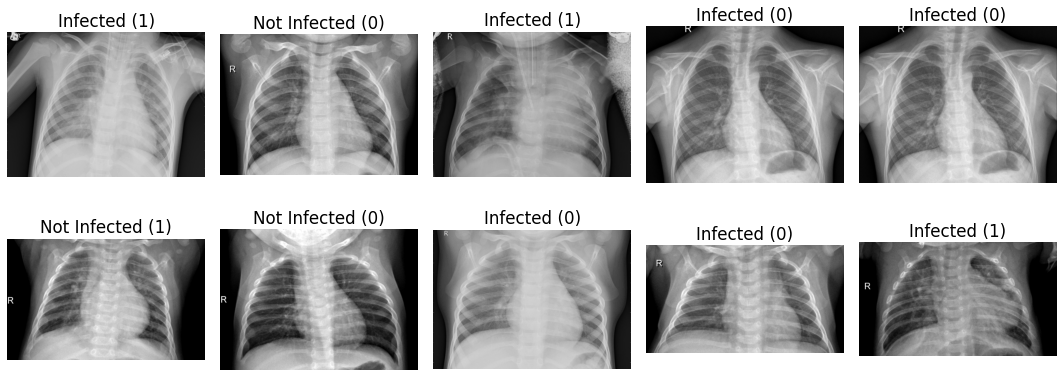

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Get predicted classes and filenames
predicted = modelvgg.predict_generator(test_image_gen)
predicted_classes = np.where(predicted > 0.5 , 1, 0 )
true_classes = test_image_gen.classes
filenames = test_image_gen.filenames

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
correct_indices = np.where(predicted_classes == true_classes)[0]
num_correct = len(correct_indices)
if num_correct >= 5:
    correct_indices = np.random.choice(correct_indices, size=5, replace=False)
else:
    correct_indices = np.random.choice(correct_indices, size=num_correct, replace=False)
    
for i, ax in enumerate(axes[0]):
    if i < len(correct_indices):
        img_path = os.path.join(test_image_gen.directory, filenames[correct_indices[i]])
        img = plt.imread(img_path, 0) # Load image in grayscale
        ax.imshow(img, cmap='gray')
        if predicted_classes[correct_indices[i]] == 0:
            ax.set_title(f"Not Infected ({true_classes[correct_indices[i]]})")
        else:
            ax.set_title(f"Infected ({true_classes[correct_indices[i]]})")
    ax.axis("off")

# Display some sample incorrectly predicted images
incorrect_indices = np.where(predicted_classes != true_classes)[0]
num_incorrect = len(incorrect_indices)
if num_incorrect >= 5:
    incorrect_indices = np.random.choice(incorrect_indices, size=5, replace=False)
else:
    incorrect_indices = np.random.choice(incorrect_indices, size=num_incorrect, replace=False)

for i, ax in enumerate(axes[1]):
    if i < len(incorrect_indices):
        img_path = os.path.join(test_image_gen.directory, filenames[incorrect_indices[i]])
        img = plt.imread(img_path, 0) # Load image in grayscale
        ax.imshow(img, cmap='gray')
        if predicted_classes[incorrect_indices[i]] == 0:
            ax.set_title(f"Not Infected ({true_classes[incorrect_indices[i]]})")
        else:
            ax.set_title(f"Infected ({true_classes[incorrect_indices[i]]})")
    ax.axis("off")
    
plt.tight_layout()
plt.show()


/tmp/ipykernel_19746/3872925467.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted = modelAlex.predict_generator(test_image_gen)


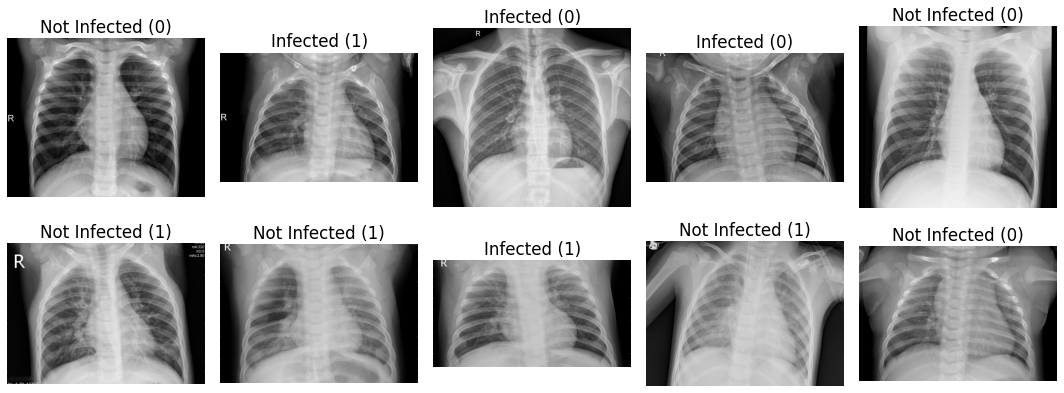

In [89]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Get predicted classes and filenames
predicted = modelAlex.predict_generator(test_image_gen)
predicted_classes = np.where(predicted > 0.5 , 1, 0 )
true_classes = test_image_gen.classes
filenames = test_image_gen.filenames

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
correct_indices = np.where(predicted_classes == true_classes)[0]
num_correct = len(correct_indices)
if num_correct >= 5:
    correct_indices = np.random.choice(correct_indices, size=5, replace=False)
else:
    correct_indices = np.random.choice(correct_indices, size=num_correct, replace=False)
    
for i, ax in enumerate(axes[0]):
    if i < len(correct_indices):
        img_path = os.path.join(test_image_gen.directory, filenames[correct_indices[i]])
        img = plt.imread(img_path, 0) # Load image in grayscale
        ax.imshow(img, cmap='gray')
        if predicted_classes[correct_indices[i]] == 0:
            ax.set_title(f"Not Infected ({true_classes[correct_indices[i]]})")
        else:
            ax.set_title(f"Infected ({true_classes[correct_indices[i]]})")
    ax.axis("off")

# Display some sample incorrectly predicted images
incorrect_indices = np.where(predicted_classes != true_classes)[0]
num_incorrect = len(incorrect_indices)
if num_incorrect >= 5:
    incorrect_indices = np.random.choice(incorrect_indices, size=5, replace=False)
else:
    incorrect_indices = np.random.choice(incorrect_indices, size=num_incorrect, replace=False)

for i, ax in enumerate(axes[1]):
    if i < len(incorrect_indices):
        img_path = os.path.join(test_image_gen.directory, filenames[incorrect_indices[i]])
        img = plt.imread(img_path, 0) # Load image in grayscale
        ax.imshow(img, cmap='gray')
        if predicted_classes[incorrect_indices[i]] == 0:
            ax.set_title(f"Not Infected ({true_classes[incorrect_indices[i]]})")
        else:
            ax.set_title(f"Infected ({true_classes[incorrect_indices[i]]})")
    ax.axis("off")
    
plt.tight_layout()
plt.show()


/tmp/ipykernel_19746/3671639252.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted = model1.predict_generator(test_image_gen)


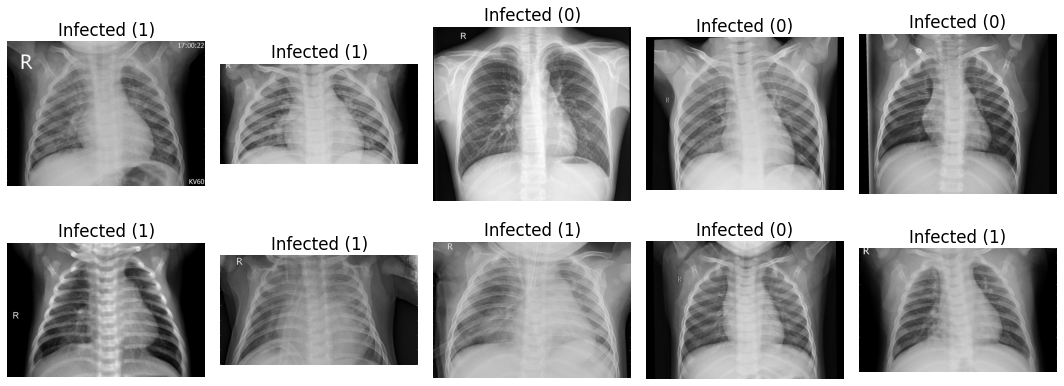

In [85]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Get predicted classes and filenames
predicted = model1.predict_generator(test_image_gen)
predicted_classes = np.where(predicted > 0.5 , 1, 0 )
true_classes = test_image_gen.classes
filenames = test_image_gen.filenames

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
correct_indices = np.where(predicted_classes == true_classes)[0]
num_correct = len(correct_indices)
if num_correct >= 5:
    correct_indices = np.random.choice(correct_indices, size=5, replace=False)
else:
    correct_indices = np.random.choice(correct_indices, size=num_correct, replace=False)
    
for i, ax in enumerate(axes[0]):
    if i < len(correct_indices):
        img_path = os.path.join(test_image_gen.directory, filenames[correct_indices[i]])
        img = plt.imread(img_path, 0) # Load image in grayscale
        ax.imshow(img, cmap='gray')
        if predicted_classes[correct_indices[i]] == 0:
            ax.set_title(f"Not Infected ({true_classes[correct_indices[i]]})")
        else:
            ax.set_title(f"Infected ({true_classes[correct_indices[i]]})")
    ax.axis("off")

# Display some sample incorrectly predicted images
incorrect_indices = np.where(predicted_classes != true_classes)[0]
num_incorrect = len(incorrect_indices)
if num_incorrect >= 5:
    incorrect_indices = np.random.choice(incorrect_indices, size=5, replace=False)
else:
    incorrect_indices = np.random.choice(incorrect_indices, size=num_incorrect, replace=False)

for i, ax in enumerate(axes[1]):
    if i < len(incorrect_indices):
        img_path = os.path.join(test_image_gen.directory, filenames[incorrect_indices[i]])
        img = plt.imread(img_path, 0) # Load image in grayscale
        ax.imshow(img, cmap='gray')
        if predicted_classes[incorrect_indices[i]] == 0:
            ax.set_title(f"Not Infected ({true_classes[incorrect_indices[i]]})")
        else:
            ax.set_title(f"Infected ({true_classes[incorrect_indices[i]]})")
    ax.axis("off")
    
plt.tight_layout()
plt.show()


/tmp/ipykernel_19746/707229143.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted = model2.predict_generator(test_image_gen)


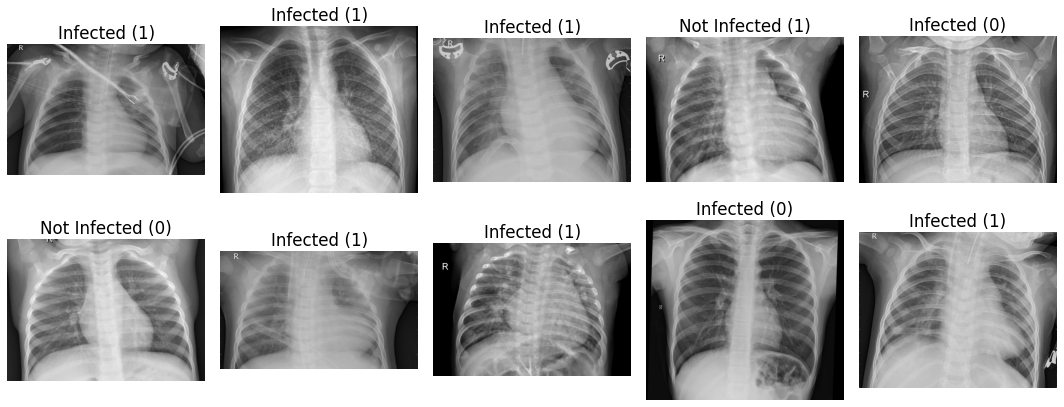

In [86]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Get predicted classes and filenames
predicted = model2.predict_generator(test_image_gen)
predicted_classes = np.where(predicted > 0.5 , 1, 0 )
true_classes = test_image_gen.classes
filenames = test_image_gen.filenames

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
correct_indices = np.where(predicted_classes == true_classes)[0]
num_correct = len(correct_indices)
if num_correct >= 5:
    correct_indices = np.random.choice(correct_indices, size=5, replace=False)
else:
    correct_indices = np.random.choice(correct_indices, size=num_correct, replace=False)
    
for i, ax in enumerate(axes[0]):
    if i < len(correct_indices):
        img_path = os.path.join(test_image_gen.directory, filenames[correct_indices[i]])
        img = plt.imread(img_path, 0) # Load image in grayscale
        ax.imshow(img, cmap='gray')
        if predicted_classes[correct_indices[i]] == 0:
            ax.set_title(f"Not Infected ({true_classes[correct_indices[i]]})")
        else:
            ax.set_title(f"Infected ({true_classes[correct_indices[i]]})")
    ax.axis("off")

# Display some sample incorrectly predicted images
incorrect_indices = np.where(predicted_classes != true_classes)[0]
num_incorrect = len(incorrect_indices)
if num_incorrect >= 5:
    incorrect_indices = np.random.choice(incorrect_indices, size=5, replace=False)
else:
    incorrect_indices = np.random.choice(incorrect_indices, size=num_incorrect, replace=False)

for i, ax in enumerate(axes[1]):
    if i < len(incorrect_indices):
        img_path = os.path.join(test_image_gen.directory, filenames[incorrect_indices[i]])
        img = plt.imread(img_path, 0) # Load image in grayscale
        ax.imshow(img, cmap='gray')
        if predicted_classes[incorrect_indices[i]] == 0:
            ax.set_title(f"Not Infected ({true_classes[incorrect_indices[i]]})")
        else:
            ax.set_title(f"Infected ({true_classes[incorrect_indices[i]]})")
    ax.axis("off")
    
plt.tight_layout()
plt.show()


/tmp/ipykernel_19746/816541795.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted = model_zf.predict_generator(test_image_gen)


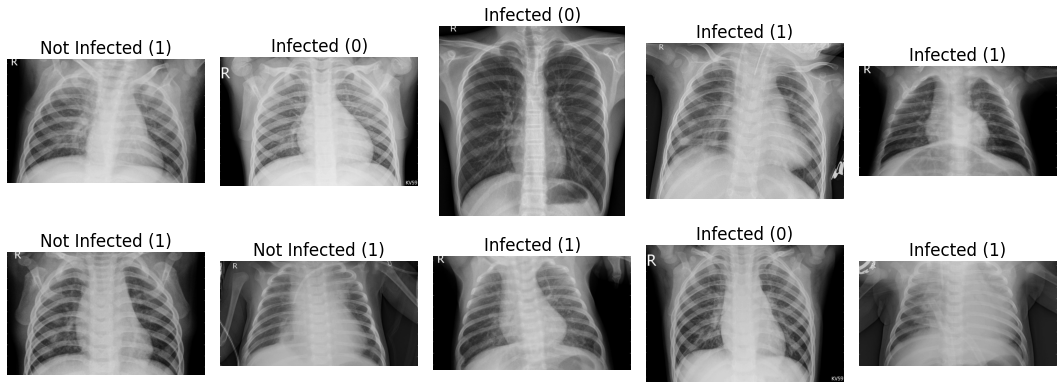

In [87]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Get predicted classes and filenames
predicted = model_zf.predict_generator(test_image_gen)
predicted_classes = np.where(predicted > 0.5 , 1, 0 )
true_classes = test_image_gen.classes
filenames = test_image_gen.filenames

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
correct_indices = np.where(predicted_classes == true_classes)[0]
num_correct = len(correct_indices)
if num_correct >= 5:
    correct_indices = np.random.choice(correct_indices, size=5, replace=False)
else:
    correct_indices = np.random.choice(correct_indices, size=num_correct, replace=False)
    
for i, ax in enumerate(axes[0]):
    if i < len(correct_indices):
        img_path = os.path.join(test_image_gen.directory, filenames[correct_indices[i]])
        img = plt.imread(img_path, 0) # Load image in grayscale
        ax.imshow(img, cmap='gray')
        if predicted_classes[correct_indices[i]] == 0:
            ax.set_title(f"Not Infected ({true_classes[correct_indices[i]]})")
        else:
            ax.set_title(f"Infected ({true_classes[correct_indices[i]]})")
    ax.axis("off")

# Display some sample incorrectly predicted images
incorrect_indices = np.where(predicted_classes != true_classes)[0]
num_incorrect = len(incorrect_indices)
if num_incorrect >= 5:
    incorrect_indices = np.random.choice(incorrect_indices, size=5, replace=False)
else:
    incorrect_indices = np.random.choice(incorrect_indices, size=num_incorrect, replace=False)

for i, ax in enumerate(axes[1]):
    if i < len(incorrect_indices):
        img_path = os.path.join(test_image_gen.directory, filenames[incorrect_indices[i]])
        img = plt.imread(img_path, 0) # Load image in grayscale
        ax.imshow(img, cmap='gray')
        if predicted_classes[incorrect_indices[i]] == 0:
            ax.set_title(f"Not Infected ({true_classes[incorrect_indices[i]]})")
        else:
            ax.set_title(f"Infected ({true_classes[incorrect_indices[i]]})")
    ax.axis("off")
    
plt.tight_layout()
plt.show()


/tmp/ipykernel_19746/3747132062.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted = modelResNet.predict_generator(test_image_gen)


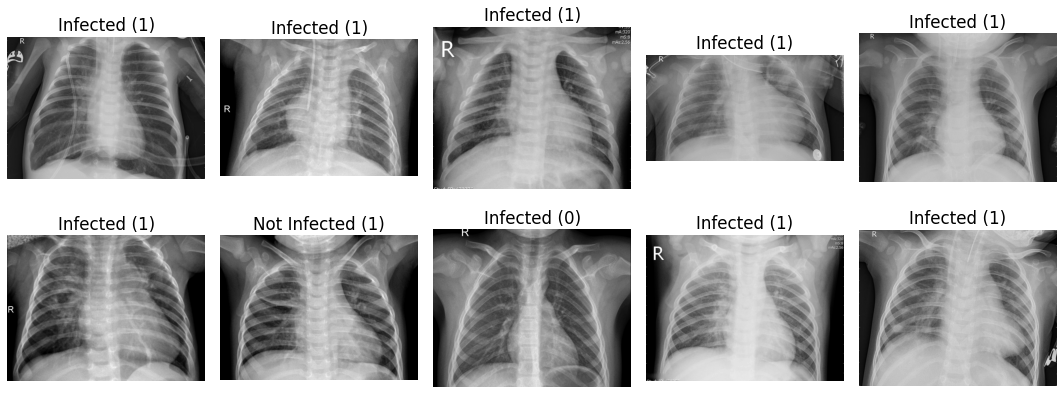

In [88]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Get predicted classes and filenames
predicted = modelResNet.predict_generator(test_image_gen)
predicted_classes = np.where(predicted > 0.5 , 1, 0 )
true_classes = test_image_gen.classes
filenames = test_image_gen.filenames

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
correct_indices = np.where(predicted_classes == true_classes)[0]
num_correct = len(correct_indices)
if num_correct >= 5:
    correct_indices = np.random.choice(correct_indices, size=5, replace=False)
else:
    correct_indices = np.random.choice(correct_indices, size=num_correct, replace=False)
    
for i, ax in enumerate(axes[0]):
    if i < len(correct_indices):
        img_path = os.path.join(test_image_gen.directory, filenames[correct_indices[i]])
        img = plt.imread(img_path, 0) # Load image in grayscale
        ax.imshow(img, cmap='gray')
        if predicted_classes[correct_indices[i]] == 0:
            ax.set_title(f"Not Infected ({true_classes[correct_indices[i]]})")
        else:
            ax.set_title(f"Infected ({true_classes[correct_indices[i]]})")
    ax.axis("off")

# Display some sample incorrectly predicted images
incorrect_indices = np.where(predicted_classes != true_classes)[0]
num_incorrect = len(incorrect_indices)
if num_incorrect >= 5:
    incorrect_indices = np.random.choice(incorrect_indices, size=5, replace=False)
else:
    incorrect_indices = np.random.choice(incorrect_indices, size=num_incorrect, replace=False)

for i, ax in enumerate(axes[1]):
    if i < len(incorrect_indices):
        img_path = os.path.join(test_image_gen.directory, filenames[incorrect_indices[i]])
        img = plt.imread(img_path, 0) # Load image in grayscale
        ax.imshow(img, cmap='gray')
        if predicted_classes[incorrect_indices[i]] == 0:
            ax.set_title(f"Not Infected ({true_classes[incorrect_indices[i]]})")
        else:
            ax.set_title(f"Infected ({true_classes[incorrect_indices[i]]})")
    ax.axis("off")
    
plt.tight_layout()
plt.show()
